# ***Imports***

In [105]:
from sympy import diff, sqrt, pi, exp, integrate, Symbol, Eq, plot_implicit
from sympy.abc import x,y
from sympy.plotting import plot
import seaborn as sns
from scipy import integrate as integrate_scipy
from sympy import Rational
sns.set()

# ***Завдання 1***

In [15]:
func = 2*(((4/(1.2*sqrt(2*pi)))*exp((-1/2)*((x-11)/1.2)**2))+(7/(2.4*sqrt(2*pi)))*exp(-1/2*((x-15)/2.4)**2))

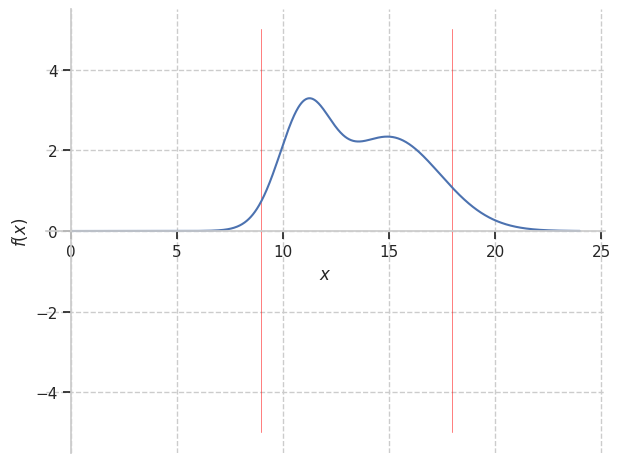

In [117]:
p1 = plot(func, (x, 0, 24), show=False)
a = plot_implicit(Eq(x, 9), (x, 0, 24), show=False, line_color="red")
b = plot_implicit(Eq(x, 18), (x, 0, 24), show=False, line_color="red")

sns.set_style("whitegrid", {'grid.linestyle': '--'})
p1.extend(a)
p1.extend(b)
p1.show()

In [19]:
indefinite_integral = integrate(func, x)
indefinite_integral

4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)

In [20]:
definite_integral = integrate(func, (x, 9, 18))
definite_integral

14.178654163478*sqrt(2)

# ***Завдання 2***

In [113]:
def rectangle_integration(f, a, b, n):
# f: функція (lambda)
# a, b: межі інтегрування
# n: кількість прямокутників (кроків)
    h = (b - a) / n
    result_rec = 0
    for i in range(n):
        x_i = a + i * h
        result_rec += f(x_i)
    return result_rec * h


f = lambda x: 2*(((4/(1.2*sqrt(2*pi)))*exp((-1/2)*((x-11)/1.2)**2))+(7/(2.4*sqrt(2*pi)))*exp(-1/2*((x-15)/2.4)**2))
a = 9
b = 18
n = 10000

approx_rec = rectangle_integration(f, a, b, n)
approx_rec

25.130840828025*sqrt(2)/sqrt(pi)

# ***Завдання 3***

In [114]:
def trapezoidal_integration(f, a, b, n):
# f: функція (lambda)
# a, b: межі інтегрування
# n: кількість трапецій (кроків)
    h = (b - a) / n
    result_tra = (f(a) + f(b))/2
    for i in range(1, n):
        x_i = a + i * h
        result_tra += f(x_i)
    return result_tra * h


f = lambda x: 2*(((4/(1.2*sqrt(2*pi)))*exp((-1/2)*((x-11)/1.2)**2))+(7/(2.4*sqrt(2*pi)))*exp(-1/2*((x-15)/2.4)**2))
a = 9
b = 18
n = 10000

approx_tra = trapezoidal_integration(f, a, b, n)
approx_tra

25.131010038835*sqrt(2)/sqrt(pi)

# ***Завдання 4***

In [115]:
def simpson_integration(f, a, b, n):
# f: функція (lambda)
# a, b: межі інтегрування
# n: кількість інтервалів (має бути парним)
    if n % 2 != 0:
        raise ValueError("Кількість інтервалів (n) має бути парним числом для методу Сімпсона.")

    h = (b - a) / n
    result_sim = f(a) + f(b)
    for i in range(1, n, 2):
        x_i = a + i * h
        result_sim += 4 * f(x_i)
    for i in range(2, n - 1, 2):
        x_i = a + i * h
        result_sim += 2 * f(x_i)
    return result_sim * h / 3


f = lambda x: 2*(((4/(1.2*sqrt(2*pi)))*exp((-1/2)*((x-11)/1.2)**2))+(7/(2.4*sqrt(2*pi)))*exp(-1/2*((x-15)/2.4)**2))
a = 9
b = 18
n = 10000

approx_sim = simpson_integration(f, a, b, n)
approx_sim

25.131010172714*sqrt(2)/sqrt(pi)

# ***Завдання 5***

In [112]:
def integrand(x):
    return 2*(((4/(1.2*sqrt(2*pi)))*exp((-1/2)*((x-11)/1.2)**2))+(7/(2.4*sqrt(2*pi)))*exp(-1/2*((x-15)/2.4)**2))

result_quad, error = integrate_scipy.quad(integrand, 9, 18)
print(f"Result: {result_quad}, Error: {error}")

Result: 20.051645014188296, Error: 1.2672390114804206e-11
